# Titanic- CaseStudy

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 

In [3]:
# get the data

In [4]:
df= pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Describe method tell us information minimum age ofpassanger was 0.42 and maximum age was 80.0. 
- Minimum fare was 0. that mean some passaengers were travelling without any fare.
- Some passengers are travelling with sibling and spouse.

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- some values are missing in Age, cabin and embarked columns

<AxesSubplot:xlabel='Age', ylabel='Density'>

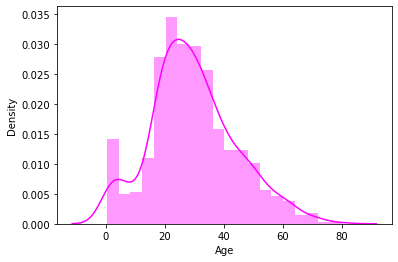

In [8]:
sns.distplot(df["Age"],color="magenta")

The distplot show the Maximum Age of passaengers lies between around 18 to 40.

<AxesSubplot:>

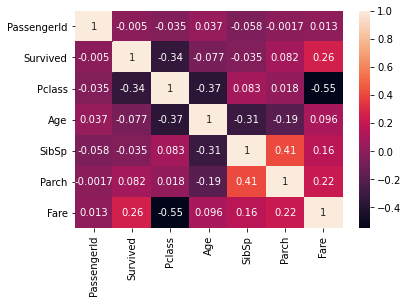

In [9]:
sns.heatmap(df.corr(),annot= True)

<AxesSubplot:>

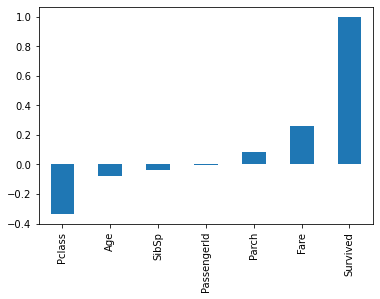

In [10]:
df.corr()['Survived'].sort_values().plot(kind= "bar")

correlation plot shows strong relation of Survived column with Fare

<AxesSubplot:xlabel='Survived', ylabel='count'>

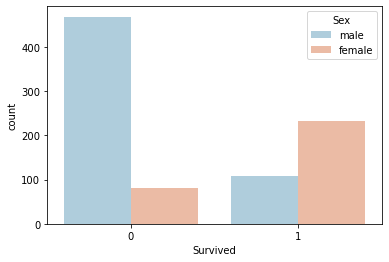

In [11]:
sns.countplot(x= "Survived",hue = "Sex",  data = df,palette= 'RdBu_r')

Among The passenger travelling Male are more than Female. But Survived percentage of female is more than male.

<AxesSubplot:xlabel='Survived', ylabel='count'>

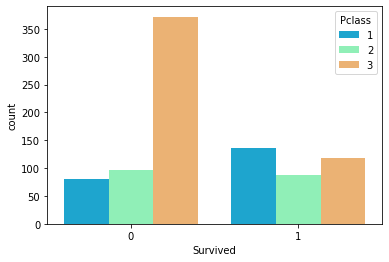

In [12]:
sns.countplot(x= "Survived",hue = "Pclass",data=df,palette="rainbow")

Passengers travelling with Class 1 have more chances of survival than other two classes.

# Data Cleaning

Age column have missing values so fill that missing values

<AxesSubplot:>

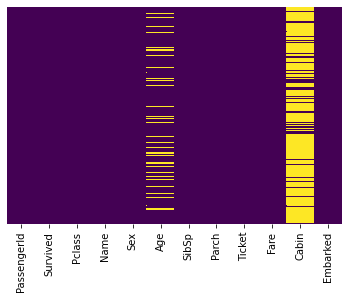

In [13]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = "viridis")

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
        
    else:
        return Age

In [15]:
df['Age']= df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

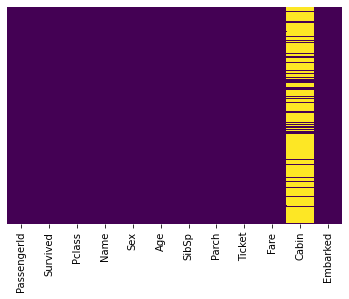

In [16]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = "viridis")

Cabin column have 687 missing values out of 891.so drop that column.

In [17]:
df.drop('Cabin', axis=1, inplace=True)

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Now only Embarked column have 2 missing values, so use dropna method.

In [19]:
df.dropna(inplace= True)

In [20]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

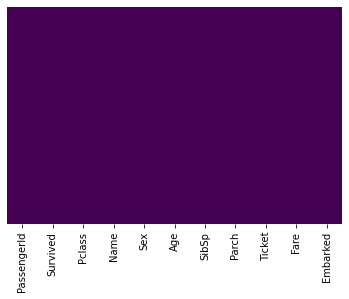

In [21]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = "viridis")

Now we have data which do not have any missing values.

In [22]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace= True)

PassengerId,Name, Tickets columns will not help in prediction so dropped that columns

Now We have cleaned data for further analysis

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Seperate X and Y

In [24]:
x= df.iloc[:,1:]
y=df.iloc[:,0]

Sex column and Embarked column are catogorical columns.convert them into numeric columns with OneHotencoding.

In [25]:
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),['Sex','Embarked'])],remainder= "passthrough")
x= np.array(ct.fit_transform(x))

# Divide the data into Train And Test

In [26]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,random_state=1)

# Model Preparation with the help of function.

In [27]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    print(f"Accuracy  :-{accuracy_score(ytest,ypred)}\n\n{confusion_matrix(ytest,ypred)}\n\n{classification_report(ytest,ypred)}")

In [28]:
logreg = LogisticRegression()
knn= KNeighborsClassifier()
svm= SVC()
svm2= SVC(kernel="linear")
dt = DecisionTreeClassifier()
dt1 = DecisionTreeClassifier(criterion="entropy")

In [29]:
mymodel(logreg)

Accuracy  :-0.8430493273542601

[[120  18]
 [ 17  68]]

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       138
           1       0.79      0.80      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



Accuracy for LogisticRegression is 84.0%

In [30]:
mymodel(knn)

Accuracy  :-0.7219730941704036

[[110  28]
 [ 34  51]]

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       138
           1       0.65      0.60      0.62        85

    accuracy                           0.72       223
   macro avg       0.70      0.70      0.70       223
weighted avg       0.72      0.72      0.72       223



Accuracy for KNeighborclassifier is 72.0%

In [31]:
mymodel(svm)

Accuracy  :-0.6502242152466368

[[113  25]
 [ 53  32]]

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       138
           1       0.56      0.38      0.45        85

    accuracy                           0.65       223
   macro avg       0.62      0.60      0.60       223
weighted avg       0.64      0.65      0.63       223



Accuracy for Support vector classifier with rbf kernel is 65.0%

In [32]:
mymodel(svm2)

Accuracy  :-0.8340807174887892

[[122  16]
 [ 21  64]]

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       138
           1       0.80      0.75      0.78        85

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



Accuracy for Support vector classifier with linear kernel is 83.40%

In [33]:
mymodel(dt)

Accuracy  :-0.8251121076233184

[[119  19]
 [ 20  65]]

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       138
           1       0.77      0.76      0.77        85

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



Accuracy for DecisionTreeClassifier with gini criterion is 83.0%

In [34]:
mymodel(dt1)

Accuracy  :-0.7623318385650224

[[110  28]
 [ 25  60]]

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       138
           1       0.68      0.71      0.69        85

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



Accuracy for DecisionTreeClassifier with entropy criterion is 75.33%

# HyperparameterTunning for LogisticRegression

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
para_l= {"C":[0.1,1,10,100,1000],"penalty":["l1","l2"]}

In [37]:
gridl= GridSearchCV(logreg,para_l,refit= True,verbose=3)
gridl.fit(xtrain,ytrain)
gpred= gridl.predict(xtest)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 2/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 3/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 4/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 5/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, penalty=l2; total time=   0.0s
[CV 2/5] END ..............................C=0.1, penalty=l2; total time=   0.0s
[CV 3/5] END ..............................C=0.1, penalty=l2; total time=   0.0s
[CV 4/5] END ..............................C=0.1, penalty=l2; total time=   0.0s
[CV 5/5] END ..............................C=0.1, penalty=l2; total time=   0.0s
[CV 1/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 2/5] END ................................C=1

In [38]:
gridl.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [39]:
gpred= gridl.predict(xtest)
print(accuracy_score(ytest,gpred))

0.8430493273542601


After tunning got accuracy 84.30% for Logistic Regression.

# HyperparameterTunning for KNN

In [40]:
accuracy = []
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors =i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

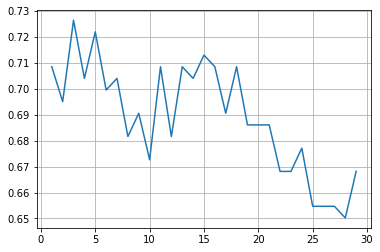

In [41]:
plt.plot(range(1,30),accuracy)
plt.grid(True)

plt.show()

In [42]:
knn=KNeighborsClassifier(n_neighbors =3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

    

In [43]:
print(accuracy_score(ytest,ypred))

0.726457399103139


After tunning got accuracy 72.64% for KNighborsclassifier.

# HyperparameterTunning for SVC with rbf kernel

In [44]:
para_s= {"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}

In [45]:
grids= GridSearchCV(svm,para_s,refit= True,verbose=3)
grids.fit(xtrain,ytrain)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 4/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 5/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.2s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.1s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.1s
[CV 4/5] END .............................C=1000, gamma=0.01; total time=   0.1s
[CV 5/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [46]:
grids.best_params_

{'C': 100, 'gamma': 0.001}

In [47]:
gpred= grids.predict(xtest)

In [48]:
print(accuracy_score(ytest,gpred))

0.8295964125560538


After tunning got accuracy 82.95% for svc with rbf kernel.

# HyperparameterTunning for SVC with linear kernel

In [49]:
svm2= SVC(kernel="linear",C=100,gamma=0.01)
svm2.fit(xtrain,ytrain)
ypred= svm2.predict(xtest)


In [50]:
print(accuracy_score(ytest,ypred))

0.8475336322869955


After tunning got accuracy 84.75% for svc with linear kernel.

# HyperparameterTunning for DecisionTreeclassifier

In [51]:
accuracy=[]
for i in range(1,101):
    dt1 = DecisionTreeClassifier(min_samples_leaf=i)
    dt1.fit(xtrain,ytrain)
    ypred= dt1.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)
    

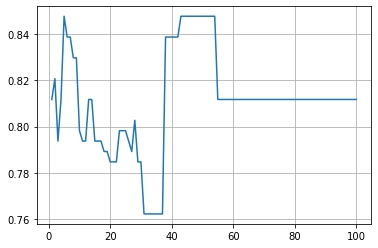

In [52]:
plt.plot(range(1,101),accuracy)
plt.grid(True)

plt.show()

In [53]:
dt1 = DecisionTreeClassifier(min_samples_leaf=50)
dt1.fit(xtrain,ytrain)
ypred= dt1.predict(xtest)

In [54]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       138
           1       0.89      0.68      0.77        85

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223



After tunning with min_sample_leaf got accuracy 85.0% for DecisionTreeClassifier.

In [55]:
accuracy=[]
for i in range(1,101):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred= dt2.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)
    

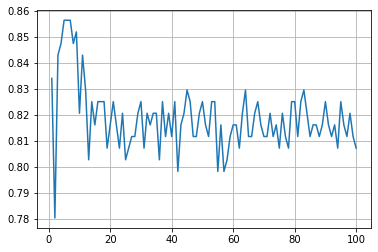

In [56]:
plt.plot(range(1,101),accuracy)
plt.grid(True)

plt.show()

In [57]:
dt2 = DecisionTreeClassifier(max_depth=10)
dt2.fit(xtrain,ytrain)
ypred= dt2.predict(xtest)

In [58]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       138
           1       0.78      0.74      0.76        85

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



After tunning with min_sample_leaf got accuracy 82.0% for DecisionTreeClassifier.

In [59]:
dt3 = DecisionTreeClassifier(criterion="entropy" ,max_depth=10)
dt3.fit(xtrain,ytrain)
ypred= dt3.predict(xtest)

In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       138
           1       0.69      0.68      0.69        85

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



After tunning with max_depth and criterion (entropy) got accuracy 77.0% for DecisionTreeClassifier.

In [61]:
dt4 = DecisionTreeClassifier(criterion="entropy" ,min_samples_leaf=50)
dt4.fit(xtrain,ytrain)
ypred= dt4.predict(xtest)

In [62]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       138
           1       0.89      0.68      0.77        85

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223



After tunning with min_sample_leaf and criterion (entropy) got accuracy 85.0% for DecisionTreeClassifier.

- Three  Model have accuracy in the range of 84-85% .
- LogisticRegression, Support vector Classifier(linear), DecisionTreeClassifier(gini)


In [63]:
models = []
models.append(("Logreg    -:",LogisticRegression(C=0.1,penalty="l2")))

models.append(("SVM-l     -:",SVC(kernel="linear",probability=True,C=100,gamma=0.1)))

models.append(("DT-g     -:",DecisionTreeClassifier(criterion='gini',min_samples_leaf=50)))


for name,model in models:
    print(name)
    mymodel(model)


Logreg    -:
Accuracy  :-0.8430493273542601

[[121  17]
 [ 18  67]]

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       138
           1       0.80      0.79      0.79        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223

SVM-l     -:
Accuracy  :-0.8475336322869955

[[123  15]
 [ 19  66]]

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       138
           1       0.81      0.78      0.80        85

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223

DT-g     -:
Accuracy  :-0.8475336322869955

[[131   7]
 [ 27  58]]

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       138
           1       0.89      0.

After HyperParameter Tunning using GridSearchCV for LogisticRegression and SupportvectorClassifier.
And Tunning Some parameters in DecisionTreeClassifier  got accuracy 84-85%

# Conclusion:


By analysing titanic dataset we can say that, the model predict 85% correct prediction.

By using machine learning technique we came to know that the chances of survival is higher for some classes like women than men.Upper class have high probabilty to be survived.


